In [283]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

np.set_printoptions(suppress=True, precision=3)

sns.set(style='ticks', palette='Set2')
sns.despine()

In [284]:
%run -i opt_model.py

In [285]:
m.run_till(100)

In [286]:
sum(1 for ev in m.state.sinks[1000] if ev.src_id == 1)

102

In [287]:
sum(1 for ev in m.state.sinks[1000] if ev.src_id == 2)

97

In [288]:
sum(1 for ev in m.state.sinks[1000] if ev.src_id == 3)

93

In [289]:
np.random.rand()

0.10312386883593261

In [337]:
m2 = Manager([1000, 1001], [Poisson(1), Hawkes(2), Opt(3)], edge_list=[(1, 1000), (3, 1000), (2, 1001), (3, 1001)])

In [338]:
m2 = Manager([1000], [Poisson(1), Hawkes(2), Opt(3)])

In [339]:
m2.run_till(10, seed=101);

In [340]:
df = m2.state.get_dataframe()

In [341]:
df.head(20)

,event_id,sink_id,src_id,t,time_delta
0,100,1000,3,0.000000,0.000000
1,101,1000,1,0.726494,0.726494
2,102,1000,1,0.755382,0.028887
3,103,1000,2,0.845524,0.090142
4,104,1000,3,0.914659,0.069135
5,105,1000,2,1.028862,0.114203
6,106,1000,3,1.239508,0.210646
7,107,1000,2,1.594113,0.354605
8,108,1000,1,1.911444,0.317331
9,109,1000,2,1.983597,0.072153


In [342]:
Distr.expon.pdf(3.010121)

0.049285714828157336

In [343]:
%run -i utils.py

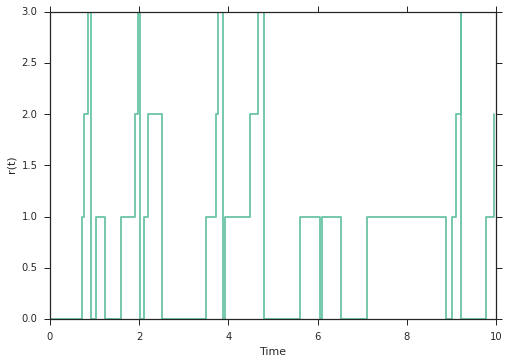

In [344]:
rank_count = rank_of_src_in_df(df, 3)
plt.step(rank_count.index, rank_count.mean(1), where='post')
plt.xlabel('Time')
plt.ylabel('r(t)')

t
0.000000      0.0
0.469268      0.5
1.382211      0.0
2.295153      0.0
2.698956      0.5
2.868553      0.0
3.038149      0.0
3.038177      0.5
3.098016      1.0
4.017098      1.5
4.037898      2.0
4.092660      2.5
4.193000      3.0
4.276585      1.0
4.360171      0.0
4.462250      0.5
4.770146      1.0
4.806473      1.0
4.842799      0.0
5.379320      0.5
5.627016      1.0
5.835597      1.0
6.044178      0.0
6.152820      0.5
6.295651      1.0
6.343214      0.5
6.390778      0.0
6.423120      0.5
6.610081      0.0
6.797042      0.0
             ... 
111.932357    1.0
112.004241    0.5
112.076125    0.0
112.222137    0.5
112.240527    0.5
112.258917    0.0
112.346752    0.5
112.445957    1.0
112.519807    1.5
112.543354    1.5
112.566901    0.0
113.747520    0.5
114.078604    0.0
114.409687    0.0
114.737964    0.5
114.863714    1.0
115.763134    1.5
115.855113    2.0
115.931119    1.5
116.007125    0.0
116.262453    0.5
117.167434    1.0
117.651209    1.5
117.699513    1.0
117.7478

In [227]:
rank_count.pivot(index='t', columns='sink_id', values='rank').fillna(method='ffill')

sink_id,1000,1001
t,,
0.000000,0,0
0.469268,1,0
1.382211,0,0
2.295153,0,0
2.698956,1,0
2.868553,0,0
3.038149,0,0
3.038177,1,0
3.098016,2,0
